# Logistic Regression Model for Mortality Prediction

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
%matplotlib inline 

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
csv = '/home/shikha/Documents/PS1/COVID-19/notebooks/clean_df.csv'
df = pd.read_csv(csv)
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,Sample No.,Patient ID,Study ID,Age,Gender,BMI,Symptoms Presented,Symptoms Present?,Fever,Cough,...,ALKALINE PHOSPHATASE,C-REACTIVE PROTEINS,ECG,CXR,CORADS SCORE ON HRCT,PATIENT CATEGORY,PLASMA THERAPY,Age Above 60?,Temp Groups,CORADS 6
0,1013,IGIB1040201013,IGIB1040201013-1,0.551724,1,0.436782,"fever, cough,breathlessness",1,1,1,...,0.127089,0.152271,sinus rhythm,normal,4.0,5a,No,0,0.2,0.0
1,1014,IGIB1040201014,IGIB1040201014-1,0.241379,0,0.804598,asymptomatic,0,0,0,...,0.172501,0.009346,sinus rhythm,normal,0.0,5b,No,0,0.6,0.0
2,1015,IGIB1040201015,IGIB1040201015-1,0.264368,1,0.402299,asymptomatic,0,0,0,...,0.259224,0.026437,sinus rhythm,normal,0.0,5b,No,0,0.4,0.0
3,1016,IGIB1040201016,IGIB1040201016-1,0.781609,1,0.321839,"fever, cough,breathlessness",1,1,1,...,0.366446,0.443161,sinus rhythm,normal,5.0,4,No,1,0.4,0.0
4,1060,IGIB1040201060,IGIB1040201060-1,0.505747,1,1.000000,"fever,cough",1,1,1,...,0.546200,0.430297,sinus rhythm,normal,5.0,4,No,0,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,950,IGIB104020950,IGIB104020950-1,0.551724,1,0.977011,"fever, cough,breathlessness",1,1,1,...,0.219174,0.334734,sinus rhythm,normal,5.0,4,No,0,0.6,0.0
171,965,IGIB104020965,IGIB104020965-1,0.321839,1,0.839080,"fever, cough,breathlessness",1,1,1,...,0.169032,0.362431,sinus tachycardia,normal,5.0,4,No,0,0.6,0.0
172,9667,IGIB1040209667,IGIB1040209667-1,0.747126,1,0.310345,"fever, breathlessness",1,1,0,...,0.177547,0.375164,sinus rhythm,normal,5.0,4,No,1,0.4,0.0
173,9759,IGIB1040209759,IGIB1040209759-1,0.689655,0,0.425287,breathlessness and cough,1,0,1,...,0.669190,0.325282,sinus rhythm,normal,6.0,4,No,1,0.6,1.0


## Model Performance

#### Performance Metrics
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

In [3]:
def visualize(x,y, model):
    
        cm = metrics.confusion_matrix(y, model.predict(x))
        plt.figure
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        plt.savefig('covidseverity.png')
        
        
def ttmodel(X, Y, lm, n):
    
        train_accuracy = [0]*n
        train_precision = [0]*n
        train_recall = [0]*n
        train_f1 = [0]*n

        test_accuracy = [0]*n
        test_precision = [0]*n
        test_recall = [0]*n
        test_f1 = [0]*n
        
        for i in range(n):
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

            lm.fit(x_train,y_train)

            train_accuracy[i] = lm.score(x_train,y_train)
            train_precision[i], train_recall[i], train_f1[i], s = sklearn.metrics.precision_recall_fscore_support(y_train, lm.predict(x_train), average='binary')

            test_accuracy[i] = lm.score(x_test,y_test)
            test_precision[i], test_recall[i], test_f1[i], s = sklearn.metrics.precision_recall_fscore_support(y_test, lm.predict(x_test), average='binary')

        print("Average training statistics over",n,"runs of the logistic regression model - ")
        print("Accuracy Score = ", sum(train_accuracy)/n)
        print("Precision Score = ", sum(train_precision)/n)    
        print("Recall Score = ", sum(train_recall)/n)   
        print("F1 Score = ", sum(train_f1)/n) 

        print()
        
        print("Average testing statistics over",n,"runs of the logistic regression model - ")
        print("Accuracy Score = ", sum(test_accuracy)/n)
        print("Precision Score = ", sum(test_precision)/n)    
        print("Recall Score = ", sum(test_recall)/n)   
        print("F1 Score = ", sum(test_f1)/n) 
        
        visualize(x_test, y_test, lm)
        
        
def cvmodel(X, Y, lm, cv):
    
        from sklearn.model_selection import cross_validate
        scoring = ['f1','roc_auc']
        scores = cross_validate(lm, X, Y, cv=cv, scoring = scoring, return_train_score=True)
        
        for k,v in scores.items():
            ans = [min(v),sum(v)/len(v),max(v)]
            print(k,"=",ans)
            print()


## Implementation

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Using Train-Test Split

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average training statistics over 100 runs of the logistic regression model - 
Accuracy Score =  0.9509160305343523
Precision Score =  0.9103908359012847
Recall Score =  0.6983895275261374
F1 Score =  0.7872340532288491

Average testing statistics over 100 runs of the logistic regression model - 
Accuracy Score =  0.9145454545454538
Precision Score =  0.8249484126984126
Recall Score =  0.5431313131313132
F1 Score =  0.6231745148556292


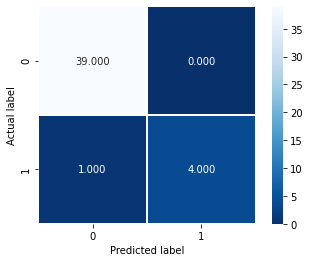

In [21]:
lm = LogisticRegression(solver = 'liblinear', max_iter = 1000, penalty = 'l1', C = 3)

#Maybe - Temp, SPO2, TOTAL PROTEINS, SODIUM
X = df[['Age Above 60?','Gender','Temp Groups','Respiratory rate(breaths per minute)','Symptoms Present?','Co-morbidity?','Cough','Breathlessness','Hypertension','C-REACTIVE PROTEINS','UREA']]
Y = df['Outcome']

ttmodel(X, Y, lm, 100)

### Using K-Fold Cross Validation

Values for minimum, average and maximum using K-fold cross validation.

In [20]:
cvmodel(X,Y,lm,7)

fit_time = [0.0028848648071289062, 0.0038809095110212055, 0.007529258728027344]

score_time = [0.0043146610260009766, 0.005733558109828404, 0.007952213287353516]

test_f1 = [0.5714285714285715, 0.7265306122448979, 0.8571428571428571]

train_f1 = [0.7647058823529412, 0.7997079854664993, 0.8947368421052632]

test_roc_auc = [0.8333333333333333, 0.9390847247990105, 1.0]

train_roc_auc = [0.9530769230769232, 0.9615805881088273, 0.9819121447028424]

